### Classification: Data Exploration

-Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Prasad Patil, Novice Data Science Storyteller, Mar 23

-The goals of exploration are to understand the signals in the data, their strength, the features that drive the outcome, and other features to construct through questions and hypotheses, in order to walk away with modeling strategies (feature selection, algorithm selection, evaluation methods, e.g.) and actionable insight.



In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from acquire import get_titanic_data
from prepare import prep_titanic

In [2]:
!jt -r

Reset css and font defaults in:
/Users/faith/.jupyter/custom &
/Users/faith/Library/Jupyter/nbextensions


In [3]:
df = get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


    -Before prep

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
deck,688,77.2
age,177,19.9
embark_town,2,0.2
embarked,2,0.2
alone,0,0.0


In [5]:
df, encoder = prep_titanic(df)

    -After prep

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,177,19.9
alone,0,0.0
embark_town,0,0.0
class,0,0.0
embarked,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
passenger_id    889 non-null int64
survived        889 non-null int64
pclass          889 non-null int64
sex             889 non-null object
age             712 non-null float64
sibsp           889 non-null int64
parch           889 non-null int64
fare            889 non-null float64
embarked        889 non-null int64
class           889 non-null object
embark_town     889 non-null object
alone           889 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


1. Split the data into 70% train and 30% test samples

    -stratify by the categorical variable you are interested in, your target

In [8]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

-Create a function that pulls numberic datatype features from a dataframe and
plots those containing less than 5 unique values.

In [9]:
def num_plot(df, target):
    """
    Takes: df
    func isolates numerical columns,
    converts column names to a list,
    plots columns with unique value counts <= than 5, x
    based on target, y
    Returns: boxplot of survival rate by category
    """
    non_object = df.select_dtypes([int, float]).columns.tolist()
    non_object.remove("passenger_id")
    for i in non_object:
        if i != target:
            if df[i].nunique() <= 5:
                sns.boxplot(x=i, y=target, data=df)
                plt.ylabel("Survival Rate")
                plt.show()


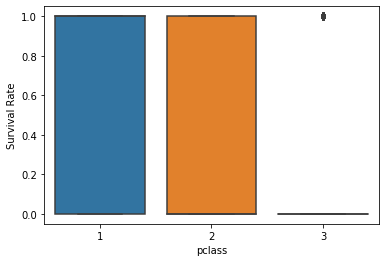

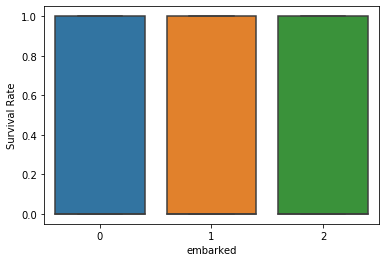

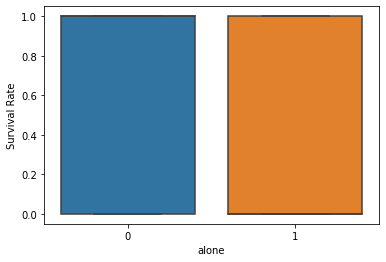

In [10]:
num_plot(train_df, "survived")

-Create function that pulls object features from dataframe and 
plots features with 5 or less unique values

In [11]:
def cat_plot(df, target):
    """
    Takes: df
    func isolates categorical columns,
    converts column names to a list,
    plots columns with unique value counts <= 5
    based on survival rate
    Returns: barplot of survival rate by category
    """
    objects = df.select_dtypes(object).columns.tolist()
    for i in objects:
        if df[i].nunique() <= 5:
            survival_rate = df.survived.mean()
            sns.barplot(i, target, data=df, alpha=.5)
            plt.ylabel("Survival Rate")
            plt.axhline(survival_rate, ls="--", color="grey")
            plt.show()

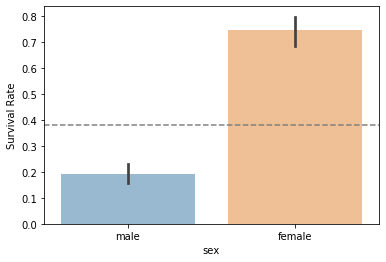

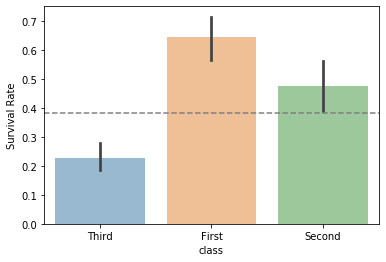

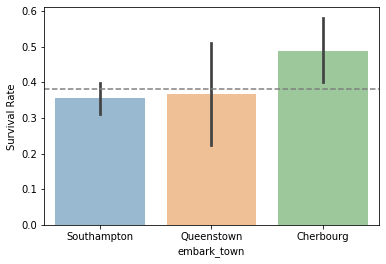

In [12]:
cat_plot(train_df, "survived")

-Exploratory Visualization

    -Remember to start with simple visuals that explain the main point you are trying to make, so that you can use those to walk others through the discovery process when presenting.

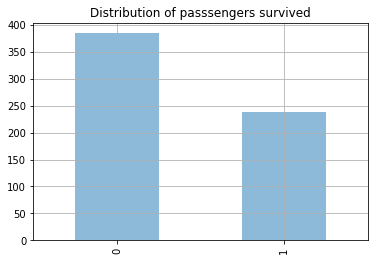

In [13]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distribution of passsengers survived")
plt.grid(b = True , which = "major")

-Barplots

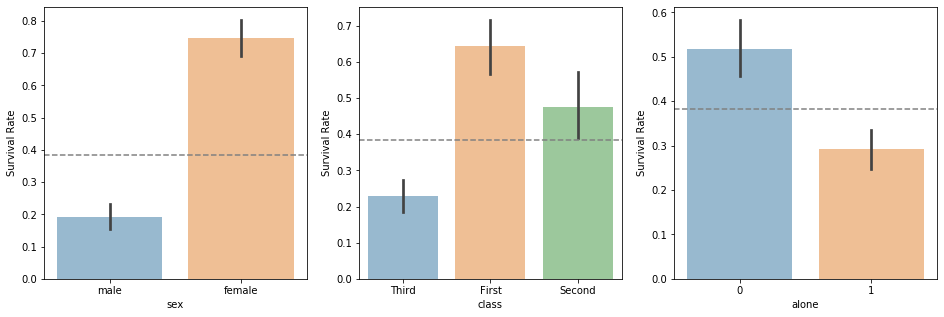

In [14]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

-Create lists of different data types

In [15]:
features = ["class", "embarked", "alone"]

-Crosstab: Discrete x Discrete

    -matrix count of probabilities

In [16]:
pd.crosstab(train_df.pclass, train_df.survived, margins=True).style.background_gradient(cmap="rocket")

survived,0,1,All
pclass,,,
1,55,100,155
2,66,60,126
3,263,78,341
All,384,238,622


    -There definitely appears to be a difference in the survival rate of those in 1st class vs. 3rd class.



In [17]:
# This data is already scaled from the prep_titanic func, so meaningless
train_df.fare.describe()

count    622.000000
mean       0.063361
std        0.092487
min        0.000000
25%        0.015412
50%        0.028302
75%        0.059914
max        1.000000
Name: fare, dtype: float64

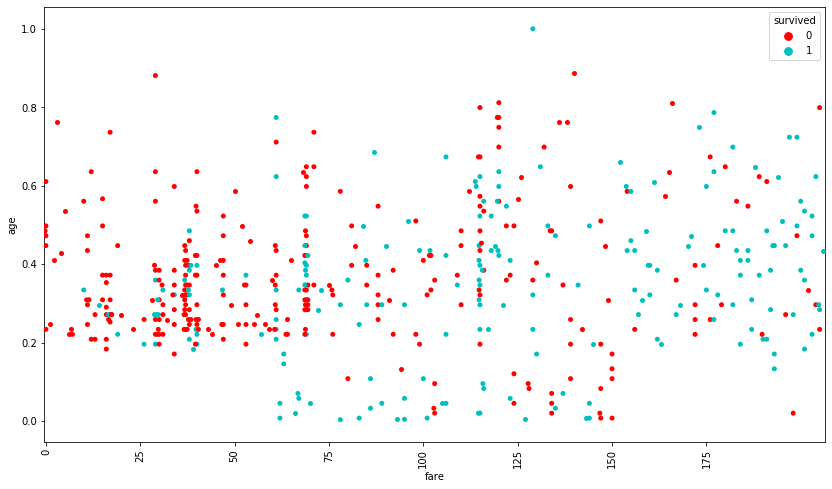

In [18]:
plt.figure(figsize=(14,8))

p = sns.swarmplot(x='fare', y='age', hue='survived',
                  palette=["r", "c"], data=train_df)


loc = plt.xticks(list(range(0,200,25)))
p.set_xticklabels(labels=list(range(0,200,25)), rotation=90, fontsize=10)

plt.show()